<a href="https://colab.research.google.com/github/PedroOlavo/ArtigosMedium/blob/main/Projeto_A_viol%C3%AAncia_no_Rio_de_Janeiro_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando o histórico de violência no Rio de Janeiro

<center><img alt="Rio de Janeiro" width="80%" src="https://rederiohoteis.com/wp-content/uploads/2020/03/2020-04-dd-outono-no-rio-de-janeiro-802x506.jpg"></center>

A cidade do Rio de Janeiro é um dos maiores pontos turísticos do mundo, conhecida por suas paisagens exuberantes, seu povo alegre e carismático e referência pela maior festa pública do mundo: o Carnaval. Porém entre tantos encantos há uma mazela: a cidade também é largamente conhecida por sua violência.

A violência é um grande problema de praticamente todas as cidades brasileiras a muito tempo, e cada vez mais vem ganhando destaque nos noticiários. 

Mas quanto a isso o governo do Rio é de certa forma transparente e disponibiliza os dados dos crimes na cidade por meio do portal [ISPDados](http://www.ispdados.rj.gov.br/). Essa iniciativa vai de encontro as leis de acesso à informação e conscientização de orgãos públicos, que tem proporcionado o acesso a diversas informações na forma de dados. Com isso, neste notebook vamos analisar os indicadores estatistícos da violência no Rio, explorando algumas das variáveis disponibilizadas.

# Obtenção e leitura dos dados

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')
dados.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Com a linha acima pudemos ver que as primeiras ocorrências que se tem notícia data de janeiro de 1991, mas qual será a última entrada, ou seja, as ocorrências derradeiras a serem notificadas?


In [ ]:
dados.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Agora sabemos que a última linha, ou seja, os casos mais recentes notificado s datam de agosto de 2019, com isso podemos perceber que temos informações das ocorrências de violência de 28 anos na cidade do Rio de Janeiro.

O que é bem impressionante, tendo em vista a quantidade de informação que deve estar presente neste dataset.

# Quantas varáveis e quantas entradas nós temos?

É importante saber com o que estamos lidando antes de começarmos a explorar os dados, por isso vamos verificar as dimensões do nosso dataset, ou seja, o tamanho dele, quantas colunas ou variáveis nós temos e a quantidade de linhas ou entradas.

In [ ]:
# verificar o tamanho do DataFrame
print("Variáveis: ", dados.shape[1])
print("Entradas: ", dados.shape[0])

Variáveis:  56
Entradas:  344


Agora entendemos que temos 56 colunas e 344 entradas, vamos descobrir o que as colunas representam.

In [ ]:
dados.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Agora sabemos que a primeira coluna representa o ano que foi feita a ocorrência, isso já tinhamos visto anteriormente com o comando `head`.

Porém percebemos que a partir da terceira coluna cada nova variável representa um tipo de infração.

Além disso, é interessante notar que cada linha corresponde a um mês de observações.

Dando sequência vamos descobrir o tipo das variáveis, para saber melhor com que tipo de dados estaremos lidando.

In [ ]:
dados.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Depois de um longo scroll para baixo, pudemos perceber que todas as variáveis são numéricas, sendo elas do tipo `int` ou `float`.

Dando sequência ao nosso estudo vamos revelar a quantidade de dados ausentes de cada coluna.

In [ ]:
# ver os valores faltantes das colunas
(dados.isnull().sum()/ dados.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Bom, com isso podemos ver que algumas colunas tem bastante valores faltantes, com certas variáveis chegando à 80% dos seus valores estarem ausentes, como o intervalo de tempo que o dataset abrange é longo podemos pensar em hipóteses que expliquem essas ausências.

* Como temos dados registrados desde o ano de 1991, alguns desses crimes poderiam não estar sendo contabilizados pelo órgão que coletou esses dados e gerou esse dataset. Estarem ausentes não significa que não existiram, e vamos pensar em formas de lidar com essa ausência mais a frente.

* Infelizmente, se tratando de Brasil, se hoje temos uma cultura de dados que ainda deixa a desejar, o que dizer da mesma no período em tela? Devemos levar em consideração também o formato em que esses dados eram registrados à época. Será que foram registrados corretamente e perdidos em períodos de digitalização? Ou será que o gerenciamento dessas informações sempre foi falho?

Tendo em vista que os dados são organizados como uma série temporal, com uma frequência de mês a mês uma boa ideia é analisar os crimes a partir da data em que começaram a ser registrados.

Ademais, podemos pensar em outras formas de olharmos esses dados e analisarmos os mesmos:
* Números mensais ou anuais de crimes;
* Categorias de crimes (contra a vida, contra o patrimônio e etc)

# Algumas informações estatísticas dos crimes no Rio

Agora usaremos o método `describe` para visualizarmos a distribuição estatísticas dos nossos dados.

Utilizando este método temos outras informações relevantes, tais como:
* Identificar outliers;
* Entender a distribuição dos dados;
* Identificar falhas na distribuição;
* Após efetuarmos uma limpeza nos dados vamos comparar para ter certeza de sua eficácia;

In [ ]:
dados.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

# Crimes por ano

O quanto a criminalidade cresceu na cidade nesse espaço de quase 30 anos?

Qual foi o número com o maior número de crimes relatados?

In [ ]:
#criando uma lista com as colunas
colunas = dados.columns
colunas = list(colunas)
colunas.remove('vano')
colunas.remove('mes')

#criando uma lista com os anos
anos = list(dados['vano'].unique())

#trocando os valores ausentes por 0
dados.fillna(value=0, inplace=True)

#criando uma coluna crimes_mensais_totais
dados['crimes_mensais_totais'] = dados.loc[:,colunas].sum(axis=1)

crimes_anuais = []

for i in anos:
  soma = dados.loc[dados['vano']==i].crimes_mensais_totais.sum()
  crimes_anuais.append(soma)

ano_dict = {'Ano':anos, 'Crimes':crimes_anuais }

crimes_ano = pd.DataFrame(ano_dict)

In [ ]:
plot_1 = go.Figure(go.Scatter(x=crimes_ano.Ano, y=crimes_ano.Crimes,
                     mode='lines+markers', line={'color': 'black'}))
plot_1.update_layout(title='Crimes totais na cidade do Rio de Janeiro entre 1991 e 2019',
                     xaxis_title='Ano',
                     yaxis_title='Número de crimes',
                     template='plotly_white')
                     

plot_1.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = crimes_ano.Ano
    )
)

plot_1.show()

Com o gráfico acima temos prova de algo que vivenciamos nos últimos anos em várias partes do Brasil: o aumento da criminalidade, no caso da cidade maravilhosa chama atenção o fato do número de crimes subir praticamente 6 vezes me menos de 30 anos. 

Entretanto, talvez essa estimativa não esteja correta, tendo em vista os dados ausentes do nosso banco de dados, pois provavelmente muitos crimes não foram notificados, o que pode levar a alguns anos a contagem total ser menor do que deveria.

In [ ]:
aux = []
aux += ano_dict.values()
final = aux[1][-2]
inicial = aux[1][0]
aumento = final / inicial
aumento = round(aumento, 2)
print('O aumento percentual na criminalidade no Rio de Janeiro foi de ',aumento*100, '%.')

O aumento percentual na criminalidade no Rio de Janeiro foi de  602.0 %.


Agora pudemos ver que os casos registrados subiram cerca de 602% nesses 28 anos, o que condiz com o gráfico. Sobretudo é importante ressaltar que para o cálculo deste percentual foi usado o número de crimes totais de 2018, visto que o ano de 2019 só conta com ocorrências relatadas até o mês de Agosto, logo percebemos cerca de 1/3 das informações daquele ano estão faltantes no dataset.

In [ ]:
#ano com mais crimes notificados
maior_n_crimes_ano = crimes_ano.Crimes.max()
ano_maior = crimes_ano.loc[crimes_ano['Crimes']==maior_n_crimes_ano].Ano.sum()
print('O ano com o maior número de crimes foi', ano_maior,'.')
print('O número total de crimes nesse ano foi', maior_n_crimes_ano,'.')


O ano com o maior número de crimes foi 2016 .
O número total de crimes nesse ano foi 2113432.0 .


Com a célula acima podemos ver que o ano de 2016 foi o que mais contou com crimes notificados, chegando a incrivel soma de 8453728 delitos totais.



# Crimes por mês

Será que nos meses do Carnaval ou do Reveillon, onde a cidade conta com um alto número de turistas, a criminalidade aumenta?

In [ ]:
#colocando a coluna mês com o nome dos meses, em vez do número de cada mês
dados['mes'] = dados['mes'].map({1:'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril',
                                 5:'Maio', 6:'Junho', 7:'Julho', 8:'Agosto',
                                 9:'Setembro', 10:'Outubro', 11:'Novembro', 12:'Dezembro'})

crimes_por_mes = []
meses = dados['mes'].unique()
for i in meses:
  soma = dados.loc[dados['mes']==i].crimes_mensais_totais.sum()
  crimes_por_mes.append(soma)

crimes_mes = {'Mês':meses, 'Crimes_totais': crimes_por_mes}
crimes_mes = pd.DataFrame(crimes_mes)


bar_plot = px.bar(crimes_mes, x='Mês', y='Crimes_totais', color='Mês', text='Crimes_totais')

bar_plot.update_layout(title_text='Número de crimes totais em cada mês no intervalo entre 1991 e 2019 no Rio de Janeiro',
                        yaxis_title = 'Número de crimes',
                        template='plotly_white')
bar_plot.update_yaxes(showticklabels=False)
bar_plot.update_traces(texttemplate='%{text:.4s}', textposition='outside')
bar_plot.show()

Com o gráfico acima percebemos que o número de crimes é bastante parecido entre os meses do ano, particularmente eu esperava um número maior de crimes em Fevereiro, Março e Dezembro tendo em vista que se tratam dos meses das festividades citadas.

# Roubo de eletrônicos

No ínicio dos anos 2000 os celulares se tornaram bem mais acessíveis, tanto por haver mais modelos a disposição para compra, como pelo fato dos preços diminuirem bastante por conta da concorrência e da evolução tecnológica.

Pensando nisso, será que nossos dados refletem esse crescimento na popularidade deste eletrônico? De forma direta, se mais pessaos tem mais celulares, provavelmente houveram mais furtos e roubos dos mesmo, tentaremos verificar se é possível comprovar esta hipótese.


In [ ]:
roubo_cel = []
for i in anos:
  soma = dados.loc[dados['vano']==i].roubo_celular.sum()
  roubo_cel.append(soma)

roubo_cel = pd.DataFrame({'Ano': anos, 'Roubos de celulares':roubo_cel})

plot_2 = go.Figure(go.Scatter(x=roubo_cel.Ano, y=roubo_cel['Roubos de celulares'],
                     mode='lines+markers', line={'color': 'blue'}))
plot_2.update_layout(title='Roubo de celulares na cidade do Rio de Janeiro entre 1991 e 2019',
                     xaxis_title='Ano',
                     yaxis_title='Número de ocorrências de roubo de celulares', template='plotly_white')
                     

plot_2.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = crimes_ano.Ano
    )
)
plot_2.show()


Com o gráfico temos algumas informações interessantes, tais como:


*   Até 1999 os roubos estão em 0, isso se dá pelo fato de para esses anos o banco de dados não tinha informações, e como foi colocado 0 nesses casos o gráfico apresenta este núnero. Entretanto, provavelmente esta não é uma informação verídica e a mesma provêm do fato de não contarmos com uma boa apuração dos fatos;
*   Realmente este crime vem se tornando mais comum nos últimos anos, mas por outro lado chama a atenção o número de casos registrados entre 2015 e 2017, neste espaço de tempo o número de roubo dobrou;
*  Além disso é válido ressaltar que no ano de maior número de casos, 2018, houve em média 71 roubos de celular por dia na cidade;

Esses são números preocupantes para a população, visto que hoje em dia o celular é um bem indispensável para a vida em sociedade, tendo em vista sua funcionalidade para comunicação e integração social.



# Crimes contra a vida

Nesta seção dedicaremos um olhar ao indicadores de crimes contra a vida no Rio de Janeiro.

Olharemos diretamente os casos de homicídio doloso, que é representado pela variável `hom_doloso`nos nossos dados.

In [ ]:
max_doloso = dados['hom_doloso'].max()
min_doloso = dados['hom_doloso'].min()

ano_max_doloso = dados.loc[dados['hom_doloso']==max_doloso].vano;
ano_max_doloso = int(ano_max_doloso)
mes_max_doloso = dados.loc[dados['hom_doloso']==max_doloso].mes;
mes_max_doloso = np.array(mes_max_doloso)

ano_min_doloso = dados.loc[dados['hom_doloso']==min_doloso].vano;
ano_min_doloso = int(ano_min_doloso)
mes_min_doloso = dados.loc[dados['hom_doloso']==min_doloso].mes;
mes_min_doloso = np.array(mes_min_doloso)

print('O maior número de homicídios dolosos foi',max_doloso,'em', mes_max_doloso[0] ,'de', ano_max_doloso)
print('O menor número de homicídios dolosos foi',min_doloso,'em', mes_min_doloso[0] ,'de', ano_min_doloso)

O maior número de homicídios dolosos foi 831 em Janeiro de 1995
O menor número de homicídios dolosos foi 272 em Junho de 2015


Acima podemos podemos ver que em Janeiro de 1995 o Rio vivenciou o maior número de homicídios dolosos no espaço entre 1991 e 2019. Por outro lado, o menor número de ocorrências deste crime foi registrado em Junho de 2015, talvez isso indique uma diminuição deste delito.

Para descobrir se realmente houve uma tendência de diminuição desta infração usaremos um gráfico de linha.



In [ ]:
hom_dol_ano = []
for i in anos:
  soma = dados.loc[dados['vano']==i].hom_doloso.sum()
  hom_dol_ano.append(soma) 


hom_dol = {'Ano': anos, 'Homicídios Dolosos':hom_dol_ano}
hom_dol = pd.DataFrame(hom_dol)

plot_3 = go.Figure(go.Scatter(x=hom_dol.Ano, y=hom_dol['Homicídios Dolosos'],
                     mode='lines+markers', line={'color': 'red'}))
plot_3.update_layout(title='Homicídios dolosos na cidade do Rio de Janeiro entre 1991 e 2019',
                     xaxis_title='Ano',
                     yaxis_title='Número de homicídios dolosos',
                    template='plotly_white')
                     

plot_3.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = crimes_ano.Ano
    )
)

plot_3.show()

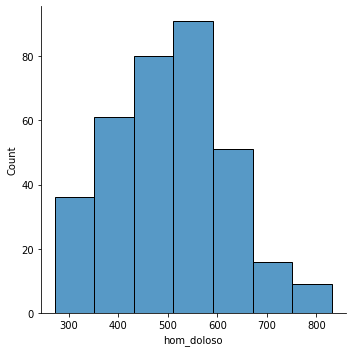

In [ ]:
sns.displot(dados, x=dados['hom_doloso'], kde=False, bins=7)

Agora temos um ótimo sinal, de fato a ocorrência deste tipo de crime vem diminuindo na cidade maravilhosa.

In [ ]:
inicial = list(hom_dol.iloc[0])
final = list(hom_dol.iloc[-2])

redu = round((1 - (final[1]/inicial[1])),2)
print('O número de homicídios dolosos diminuiu cerca de', redu*100, '% entre 1991 e 2018 no Rio de Janeiro.')

O número de homicídios dolosos diminuiu cerca de 34.0 % entre 1991 e 2018 no Rio de Janeiro.


Porém este indicador nos incita a uma nova questão: Será que as tentativas de homicídios diminuiram no período ou talvez os serviços de resgate estejam salvando mais as vítimas dessas tentativas?

Para responder verificaremos a variável `tentat_hom` para observarmos o comportamento das tentativas de homícido no espaço de tempo referido.



In [ ]:
tenta_hom = []
for i in anos:
  soma = dados.loc[dados['vano']==i].tentat_hom.sum()
  tenta_hom.append(soma)

tenta_hom = pd.DataFrame({'Ano': anos, 'Tentativas de Homícidio':tenta_hom})

plot_4 = go.Figure(go.Scatter(x=tenta_hom.Ano, y=tenta_hom['Tentativas de Homícidio'],
                     mode='lines+markers', line={'color': 'red'}))
plot_4.update_layout(title='Tentativas de homicídio na cidade do Rio de Janeiro entre 1991 e 2019',
                     xaxis_title='Ano',
                     yaxis_title='Número de ocorrências de tentativa de homicídio',
                     template='plotly_white')
                     

plot_4.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = crimes_ano.Ano
    )
)

plot_4.show()

Com isso percebemos que o número de tentativas de homicídio aumentaram nos últimos anos na capital, o que é bem desanimador por mais que muitas das tentativas tenham sido frustradas de acordo com o gráfico do número de homicídios dolosos.

# Crimes contra o patrimônio - Veículos

Na seção final deste projeto, nos dedicaremos a analisar o histórico de roubo e furto de veículos na capital carioca. 

Problema bastante comum nas metrópoles do Brasil, tal tipo de delito merece um lugar de destaque no nosso estudo. É importante ressaltar que temos informações sobre roubo, furto e recuperação de veículos nos nossos dados, que correspondem, respectivamente, às colunas `roubo_veiculo`, `furto_veiculos` e `recuperacao_veiculos`.

Vamos começar descobrindo a quantidade total de veículos que foram roubados e furtados, com isso seremos capazes de descobrir o montante de veículos que foram tirados de seus donos no perídodo analisado. 


In [ ]:
vei_rou_tot = dados['roubo_veiculo'].sum()
vei_fur_tot = dados['furto_veiculos'].sum()

vei_total = vei_rou_tot + vei_fur_tot

print('O número de veículos roubados nesses 28 anos foi', vei_rou_tot)
print('A quantiade de veículos furtados nesse período foi', vei_fur_tot)
print(vei_total,'veículos foram subtraídos de seus donos no espaço de tempo analisado.')

O número de veículos roubados nesses 28 anos foi 842352
A quantiade de veículos furtados nesse período foi 576087
1418439 veículos foram subtraídos de seus donos no espaço de tempo analisado.


É impressionante que mais de 800 mil veículos tenham sido roubados e outros 57000 mil tenham sido furtados em apenas uma cidade nesses 28 anos.

Agora vamos analisar em média quantos veículos são roubados e furtados por mês no Rio de Janeiro.

In [ ]:
vei_rou_med = round(dados['roubo_veiculo'].mean())
vei_fur_med = round(dados['furto_veiculos'].mean())

print('O número de veículos roubados por mês é, em média,', vei_rou_med)
print('A média de veículos furtados a cada mês é', vei_fur_med)

O número de veículos roubados por mês é, em média, 2449
A média de veículos furtados a cada mês é 1675


Agora nos atentaremos aos veículos recuperados, vamos descobrir quantos são recuperados em média a cada mês e o quanto esse número representa percentualmente dos crimes.

In [ ]:
vei_recu_tot = dados['recuperacao_veiculos'].sum()
vei_recu_med = dados['recuperacao_veiculos'].mean()

vei_recu_med_per = round((100 * (vei_recu_tot / vei_total)),2)
print('O total de veículos recuperados foi de', vei_recu_tot)
print('Em média,',vei_recu_med_per,'% dos veículos subtraídos são recuperados.')


O total de veículos recuperados foi de 609650
Em média, 42.98 % dos veículos subtraídos são recuperados.


É interessante notar que um alto número de veículos são recuperados, chegando a mais de 40%, é um ponto bastante positivo da segurança da cidade. Porém, nosso dataset não nos oferece informações se os veículos são recuperados em bom estado ou após serem alvo de desmanche e retirada de peças.

# Conclusão

Com este estudo obtivemos algumas informações bastante relevantes e até animadoras, como por exemplo o fato dos homicídios estarem diminuindo ano após ano no Rio, além disso a recuperação de veículos roubados na cidade apresenta resultados bastante expressivos, já que a cada 5 veículos roubados 2 são recuperados. Por outro lado, crimes menores como o roubo de celulares vêm aumentando nos últimos anos e a prefeitura devia criar estratégias de segurança pública a fim de evitar estes crimes.


Outra reflexão importante é a de que o Brasil ainda precisa melhorar e muito na questão da sua cultura de dados, pois bastante informações parecem estar errôneas ou terem sido subnotificadas. 